###  SPG 114 - Operational Risk Financial Requirement Modelling

#### Overview
It is a requirement for an RSE (registrable superannuation entity) licensee to maintain adequate financial resources to address operational risk events that may affect its business operations.

APRA does not endorse any particular approach for determining the ORFR target amount. APRA expects that the majority of RSE licensees would determine their ORFR target amount based on a fairly straightforward approach.

There is scope for broad interpretation of the range of impacts that the ORFR target amount aims to cover. It is APRA’s view that the ORFR target amount would be based, at a minimum, on the predicted impact of operational risk events that may have a material impact on the RSE licensee’s business operations. This minimum expectation excludes extreme events that may
have a catastrophic impact.

For more information refer to: https://www.apra.gov.au/sites/default/files/prudential-practice-guide-spg-114-operational-risk-financial-requirement-july-2013_0.pdf

In [1]:
# Numerical computing 
import numpy as np
from scipy.stats import norm

# Data analysis and manipulation
import pandas as pd

# visualisation
import matplotlib.pyplot as plt
%matplotlib inline

#### Inputs 
The input required is a csv or table including the following five fields:
1. Risk Name: name of the operational risk
2. Chance: probability of the event occuring annually.
3. Minimum Cost: The estimated minimum expense if the risk occured.
4. Median: The estimated middle value if risk occured or what the usual expense is likely to be.
5. Maximum Cost: The estimated maximum expense if the risk occured. We will be assuming the maximum cost is the 90th percentile and not the absolute max.

In [2]:
# Load the inputs
df = pd.read_csv('Op-risks.csv')

df

,Risk Name,Chance,Min_Cost,Median,Max_Cost
0,Fraud,0.05,150000,1500000,36500000
1,Regulatory Change,0.15,80000,730000,18300000
2,Outsourcing Activities,0.10,80000,730000,14600000
3,Failure to adhere to internal policies,0.05,150000,1500000,36500000
4,Human Error,0.65,8000,80000,7300000
5,Talent Retention,0.98,50000,200000,500000
6,IT implementation,0.65,5000,150000,5900000
7,Business disruption,0.95,500,20000,50000
8,Organisational Change,0.95,8000,80000,7300000
9,Data Compromise,0.65,5000,30000,2000000


#### Log-Normal Distribution and Parameters
For the above op risks we will assume a shifted log normal distribution of costs with a definite minimum.
In order to run simulations we require three parameters.
1. Shift (Minimum Cost)
2. Mu (the mean of the underlying normal distribution)
3. Sigma (the standard deviation of the underlying normal distribution)

The values we have to work with are:
1. Minimum Cost
2. Median Cost (50th Percentile)
3. Maximum Cost (90th Percentile)

We know that:

$Median = exp(\mu) $

and

$X = e^{\mu + \sigma Z}$ 

So we can see:
1. Shift = Minimum Cost
2. mu = log(Median(50th Percentile))
3. sigma = log(Maximum(90th Percentile) - mu) / Z (0.9)

In [3]:
# Create Pre Shift Columns to calculate mu and sigma
df['Median_pre_shift'] = df['Median'] - df['Min_Cost']
df['X90_pre_shift'] = df['Max_Cost'] - df['Min_Cost']

df

,Risk Name,Chance,Min_Cost,Median,Max_Cost,Median_pre_shift,X90_pre_shift
0,Fraud,0.05,150000,1500000,36500000,1350000,36350000
1,Regulatory Change,0.15,80000,730000,18300000,650000,18220000
2,Outsourcing Activities,0.10,80000,730000,14600000,650000,14520000
3,Failure to adhere to internal policies,0.05,150000,1500000,36500000,1350000,36350000
4,Human Error,0.65,8000,80000,7300000,72000,7292000
5,Talent Retention,0.98,50000,200000,500000,150000,450000
6,IT implementation,0.65,5000,150000,5900000,145000,5895000
7,Business disruption,0.95,500,20000,50000,19500,49500
8,Organisational Change,0.95,8000,80000,7300000,72000,7292000
9,Data Compromise,0.65,5000,30000,2000000,25000,1995000


In [4]:
# Inverse normal function
z90 = norm.ppf(0.9)

# mu/sigma columns for each risk
df['mu'] = np.log(df['Median_pre_shift'])
df['sigma'] = (np.log(df['X90_pre_shift']) - df['mu']) / z90

df

,Risk Name,Chance,Min_Cost,Median,Max_Cost,Median_pre_shift,X90_pre_shift,mu,sigma
0,Fraud,0.05,150000,1500000,36500000,1350000,36350000,14.115615,2.569611
1,Regulatory Change,0.15,80000,730000,18300000,650000,18220000,13.384728,2.600990
2,Outsourcing Activities,0.10,80000,730000,14600000,650000,14520000,13.384728,2.423867
3,Failure to adhere to internal policies,0.05,150000,1500000,36500000,1350000,36350000,14.115615,2.569611
4,Human Error,0.65,8000,80000,7300000,72000,7292000,11.184421,3.603341
5,Talent Retention,0.98,50000,200000,500000,150000,450000,11.918391,0.857252
6,IT implementation,0.65,5000,150000,5900000,145000,5895000,11.884489,2.891125
7,Business disruption,0.95,500,20000,50000,19500,49500,9.878170,0.726899
8,Organisational Change,0.95,8000,80000,7300000,72000,7292000,11.184421,3.603341
9,Data Compromise,0.65,5000,30000,2000000,25000,1995000,10.126631,3.417360


#### Simulating Random Scenarios
For each risk we need to generate 10,000 scenarios that will:
1. Check if the risk occured based on each probability
2. If the risk occured to generate a random cost assuming a log-normal distrubution using the paramaters (mu & sigma) for that risk. If the risk did not occur then the cost to the business is 0.

In [5]:
rng = np.random.RandomState(304)

# Generate n scenarios
n = 10000
risk_scen_values = []
risk_scen_names = []

# Main loop
for index, row in df.iterrows():
    lognorms = row['Min_Cost'] + rng.lognormal(row['mu'], row['sigma'], n)
    chance = rng.rand(n)
    risk_scen_values.extend(lognorms*(chance < row['Chance']))
    risk_scen_names.extend([row['Risk Name']]*n)

indices = np.mod(np.arange(n*(index+1)), n)


sdf = pd.DataFrame({'sample': indices,
                    'Risk Name': risk_scen_names,
                    'Cost': risk_scen_values})

sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   sample     150000 non-null  int32  
 1   Risk Name  150000 non-null  object 
 2   Cost       150000 non-null  float64
dtypes: float64(1), int32(1), object(1)
memory usage: 2.9+ MB


#### Reserve Amount
Once we have thousands of scenario costs, we can sum the total cost of risks occured and calulate the amount to hold as reserves.

We can print out some percentiles to see the value for at each percentile and decide how much to hold as reserves.

In [6]:
pct_90 = np.percentile(sdf.groupby('sample').sum(), 90)
pct_91 = np.percentile(sdf.groupby('sample').sum(), 91)
pct_92 = np.percentile(sdf.groupby('sample').sum(), 92)
pct_93 = np.percentile(sdf.groupby('sample').sum(), 93)
pct_94 = np.percentile(sdf.groupby('sample').sum(), 94)
pct_95 = np.percentile(sdf.groupby('sample').sum(), 95)
pct_96 = np.percentile(sdf.groupby('sample').sum(), 96)

print('The 90th percentile scenario cost is $' '{:20,.2f}'.format(pct_90))
print('The 91th percentile scenario cost is $' '{:20,.2f}'.format(pct_91))
print('The 92th percentile scenario cost is $' '{:20,.2f}'.format(pct_92))
print('The 93th percentile scenario cost is $' '{:20,.2f}'.format(pct_93))
print('The 94th percentile scenario cost is $' '{:20,.2f}'.format(pct_94))
print('The 95th percentile scenario cost is $' '{:20,.2f}'.format(pct_95))
print('The 96th percentile scenario cost is $' '{:20,.2f}'.format(pct_96))

The 90th percentile scenario cost is $       54,426,538.74
The 91th percentile scenario cost is $       62,540,876.30
The 92th percentile scenario cost is $       73,333,962.38
The 93th percentile scenario cost is $       86,318,086.76
The 94th percentile scenario cost is $      104,959,686.06
The 95th percentile scenario cost is $      137,622,881.95
The 96th percentile scenario cost is $      188,228,129.00


#### Pivot
We can pivot the data so that it is easier to digest or analyse. This is an easier format if the user decides to import the data into Excel.

In [7]:
sdf_pivot = sdf.pivot(index='sample', columns='Risk Name', values='Cost')
sdf_pivot = sdf_pivot.apply(pd.to_numeric)

sdf_pivot.head(8)

Risk Name,Business disruption,Data Compromise,Failure to adhere to internal policies,Fraud,Human Error,IT implementation,Model Risk,Organisational Change,Outsourcing Activities,Poor management of underfunded DB plans,Process Failure,Quality Risk,Regulatory Change,Talent Retention,Unauthorised trading
sample,,,,,,,,,,,,,,,
0,13933.597233,6.717452e+03,0.0,0.000000,5.707787e+06,5.980657e+06,0.000000e+00,2.094428e+05,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,101056.830269,0.000000
1,12575.231507,7.726686e+04,0.0,0.000000,7.321052e+04,5.255217e+07,5.689576e+04,3.449306e+04,0.000000e+00,8.350227e+05,0.0,3416.759311,0.0,72356.017401,0.000000
2,24070.373027,5.346319e+03,0.0,0.000000,0.000000e+00,2.346183e+04,0.000000e+00,4.845682e+07,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,140028.289311,0.000000
3,21464.071787,3.099390e+06,0.0,0.000000,8.381249e+03,0.000000e+00,0.000000e+00,2.158856e+04,1.919983e+08,3.275036e+06,0.0,0.000000,0.0,167523.268613,0.000000
4,14039.003113,0.000000e+00,0.0,243806.225422,1.665628e+05,0.000000e+00,0.000000e+00,1.340499e+04,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,551712.140412,0.000000
5,24319.622651,5.305773e+03,0.0,0.000000,0.000000e+00,2.660348e+04,0.000000e+00,5.005655e+07,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,462002.539477,75551.781374
6,0.000000,1.435364e+04,0.0,0.000000,1.616278e+04,1.324155e+05,0.000000e+00,6.014597e+05,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,218130.350732,0.000000
7,16554.789620,0.000000e+00,0.0,0.000000,0.000000e+00,3.757188e+05,4.830340e+06,8.824462e+03,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,119600.988376,0.000000


#### Visualisations
We can pick a Risk and check if the distribution shape is as we expect.

<ipython-input-8-32e6bf23a52d>:7: RuntimeWarning: divide by zero encountered in log
  pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
<ipython-input-8-32e6bf23a52d>:7: RuntimeWarning: invalid value encountered in true_divide
  pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))


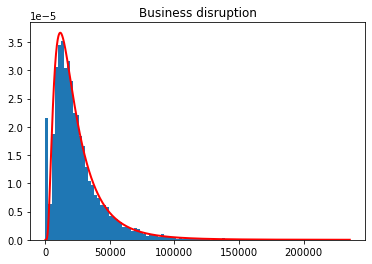

In [8]:
mu, sigma = 9.878170, 0.726899 # mean and standard deviation for Business disruption
s = sdf_pivot['Business disruption']

count, bins, ignored = plt.hist(s, 100, density=True, align='mid')

x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
       / (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=2, color='r')
plt.axis('tight')
plt.title('Business disruption')
plt.show()

#### Further enhancements
1. Using correlation inputs to generated correlated scenarios 